In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from scipy import interpolate
from redshift_fit_lib import *

In [4]:
loaddir = '/Users/thepoetoftwilight/Documents/CUBS/1D_Extractions_updated/'

In [5]:
spec_1d_fits_1 = fits.open(loaddir + 'EG2741/844_1dspec.fits')

wav0_1 = spec_1d_fits_1[0].header['CRVAL1']
delta_wav_1 = spec_1d_fits_1[0].header['CDELT1']

flux_1 = spec_1d_fits_1[0].data[4,:]
err_1 = spec_1d_fits_1[0].data[5,:]

wav_1 = np.arange(wav0_1, wav0_1+len(flux_1)*delta_wav_1, delta_wav_1)

In [6]:
spec_1d_fits_2 = fits.open(loaddir + 'EG2742/760_1dspec.fits')

wav0_2 = spec_1d_fits_2[0].header['CRVAL1']
delta_wav_2 = spec_1d_fits_2[0].header['CDELT1']

flux_2 = spec_1d_fits_2[0].data[4,:]
err_2 = spec_1d_fits_2[0].data[5,:]

wav_2 = np.arange(wav0_2, wav0_2+len(flux_2)*delta_wav_2, delta_wav_2)

Text(0, 0.5, 'Flux (arbitrary units)')

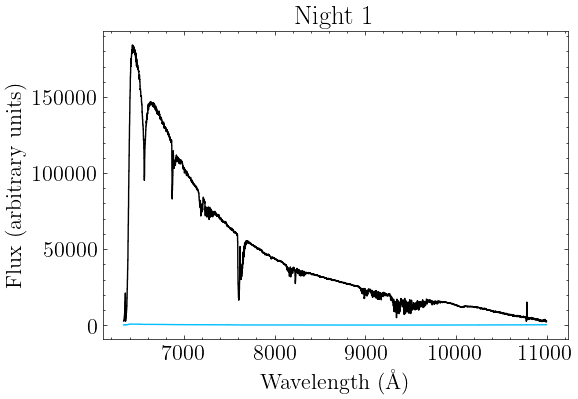

In [7]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.step(wav_1, flux_1, where='mid')
ax.step(wav_1, err_1, where='mid')

ax.set_title('Night 1')

ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel('Flux (arbitrary units)')

Text(0, 0.5, 'Flux (arbitrary units)')

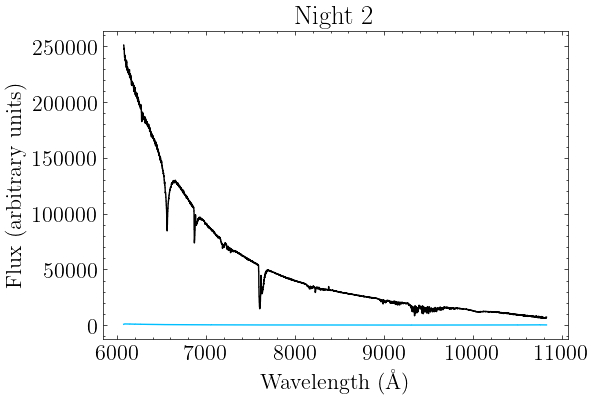

In [8]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.step(wav_2, flux_2, where='mid')
ax.step(wav_2, err_2, where='mid')

ax.set_title('Night 2')

ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel('Flux (arbitrary units)')

Now, we need a standard file

In [9]:
spec_ref_arr = np.loadtxt(loaddir+'EG2741/feg274.dat')

In [10]:
wav_ref = spec_ref_arr[:,0]
flux_ref = 1e-16*spec_ref_arr[:,1]

In [11]:
idx = (wav_ref>=wav_1[0])&(wav_ref<=wav_1[-1])
#idx = (wav_ref>=3000)&(wav_ref<=wav[-1])

Text(0, 0.5, '$F_\\lambda$ (erg/cm${}^2$/s/Å)')

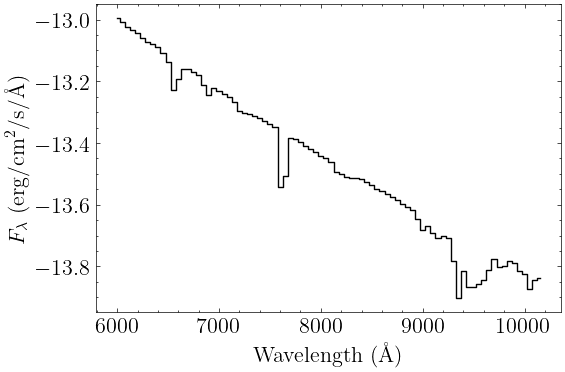

In [12]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.step(wav_ref[idx], np.log10(flux_ref[idx]), where='mid')

ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel(r'$F_\lambda$ (erg/cm${}^2$/s/Å)')

Compare fluxes

In [11]:
flux_ref_interp = np.interp(wav_1, np.array(wav_ref[idx]), np.array(flux_ref[idx]))

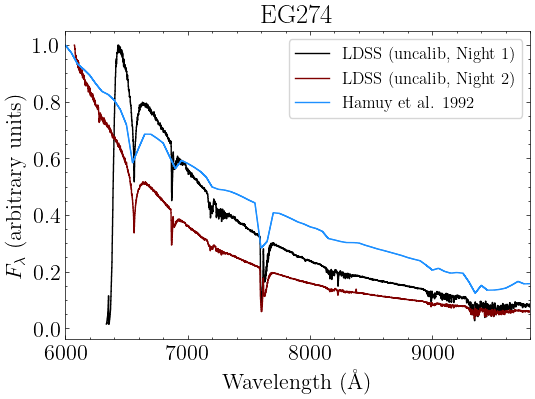

In [12]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.step(wav_1, flux_1/np.nanmax(flux_1), where='mid', label='LDSS (uncalib, Night 1)', color='black')
ax.step(wav_2, flux_2/np.nanmax(flux_2), where='mid', label='LDSS (uncalib, Night 2)', color='maroon')

ax.step(wav_1, flux_ref_interp/np.max(flux_ref_interp), where='mid', color='dodgerblue', label='Hamuy et al. 1992')

ax.set_title('EG274')
ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel(r'$F_\lambda$ (arbitrary units)')

ax.set_xlim(6000,9800)
ax.legend()

Both night 1 and night 2 mask images had the filter on, and were taken at similar airmasses. So the fewer blue photons for night 2 are solely a function of poorer seeing. We'll continue with the night 1 spectrum. Let us first smooth it out, indicating "problematic" windows.

In [27]:
smooth_windows_1 = [[6000,6650],
                    [6820,6930],
                    [7150,7350],
                    [7550,7700],
                    [8100,8350],
                    [8950,9800],
                    [10750,10800]]

(6000.0, 10998.839907193968)

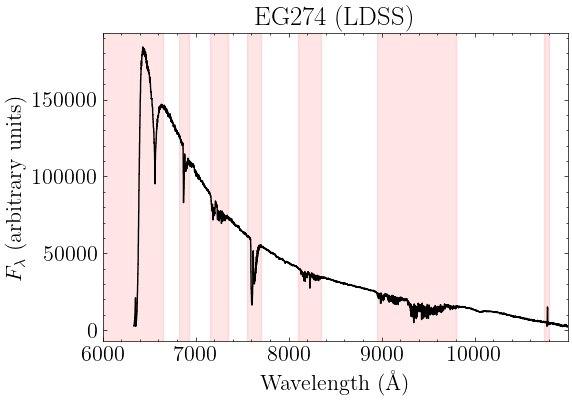

In [28]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.step(wav_1, flux_1, where='mid')

for i in range(len(smooth_windows_1)):
    ax.axvspan(xmin=smooth_windows_1[i][0], xmax=smooth_windows_1[i][1], color='red', alpha=.1)

ax.set_title('EG274 (LDSS)')
ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel(r'$F_\lambda$ (arbitrary units)')

ax.set_xlim(wav_1[0],wav_1[-1])

In [29]:
wav_1_filt = np.copy(wav_1)
flux_1_filt = np.copy(flux_1)

for i in range(len(smooth_windows_1)):
    
    idx = (wav_1_filt>=smooth_windows_1[i][0])&(wav_1_filt<=smooth_windows_1[i][1])
    wav_1_filt[idx] = np.nan
    flux_1_filt[idx] = np.nan

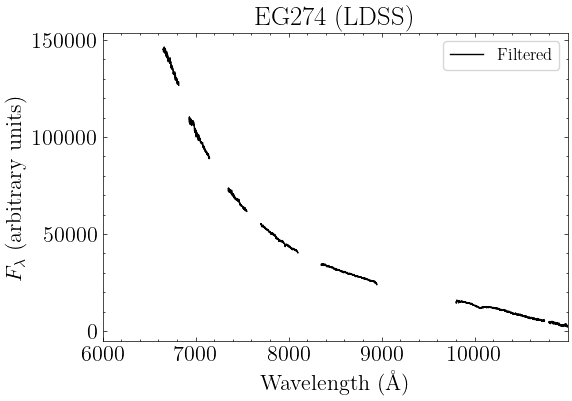

In [30]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.step(wav_1_filt, flux_1_filt, where='mid', label='Filtered')

#for i in range(len(smooth_windows_1)):
#    ax.axvspan(xmin=smooth_windows_1[i][0], xmax=smooth_windows_1[i][1], color='red', alpha=.1)

ax.set_title('EG274 (LDSS)')
ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel(r'$F_\lambda$ (arbitrary units)')

ax.set_xlim(wav_1[0],wav_1[-1])
ax.legend()

In [31]:
flux_1_smooth_func = interpolate.interp1d(x=wav_1_filt, y=flux_1_filt, fill_value='extrapolate')
flux_1_smooth = flux_1_smooth_func(wav_1)

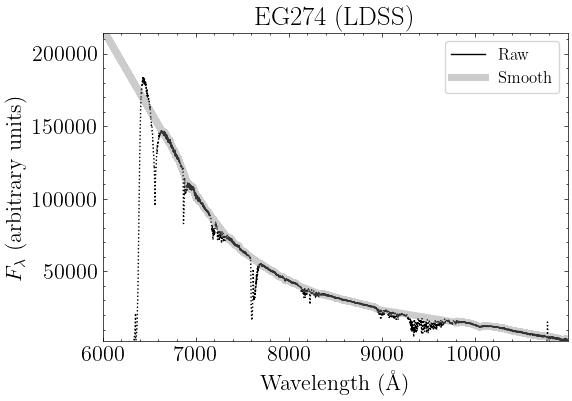

In [50]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.step(wav_1, flux_1, where='mid', color='black', linestyle=':')
ax.step(wav_1_filt, flux_1_filt, where='mid', label='Raw', color='black')
ax.step(wav_1, flux_1_smooth, where='mid', label='Smooth', color='gray', lw=5, alpha=.4)

ax.set_title('EG274 (LDSS)')
ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel(r'$F_\lambda$ (arbitrary units)')

ax.set_xlim(wav_1[0],wav_1[-1])
ax.set_ylim(np.nanmin(flux_1),np.nanmax(flux_1)+30000)
ax.legend()

Now, let us smooth the "true" spectrum

In [51]:
smooth_windows_ref = [[6470,6650],
                    [6800,6950],
                    [7150,7300],
                    [7550,7700],
                    [8100,8400],
                    [8900,10100]]

(6000.0, 10998.839907193968)

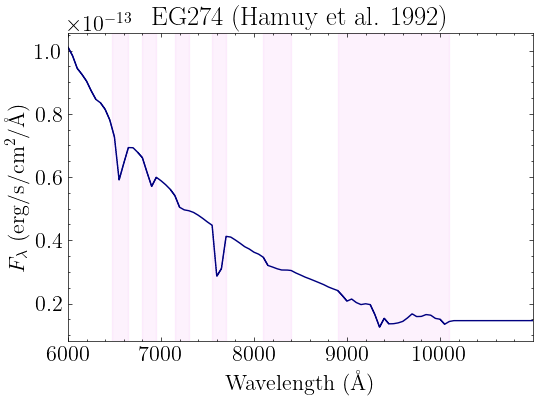

In [52]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.step(wav_1, flux_ref_interp, color='navy',
        where='mid')

for i in range(len(smooth_windows_ref)):
    ax.axvspan(xmin=smooth_windows_ref[i][0], xmax=smooth_windows_ref[i][1], color='violet', alpha=.1)
    
ax.set_title('EG274 (Hamuy et al. 1992)')
ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel(r'$F_\lambda$ (erg/s/cm${}^2$/Å)')

ax.set_xlim(wav_1[0],wav_1[-1])

In [53]:
wav_ref_filt = np.copy(wav_1)
flux_ref_filt = np.copy(flux_ref_interp)

for i in range(len(smooth_windows_ref)):
    
    idx = (wav_ref_filt>=smooth_windows_ref[i][0])&(wav_ref_filt<=smooth_windows_ref[i][1])
    wav_ref_filt[idx] = np.nan
    flux_ref_filt[idx] = np.nan

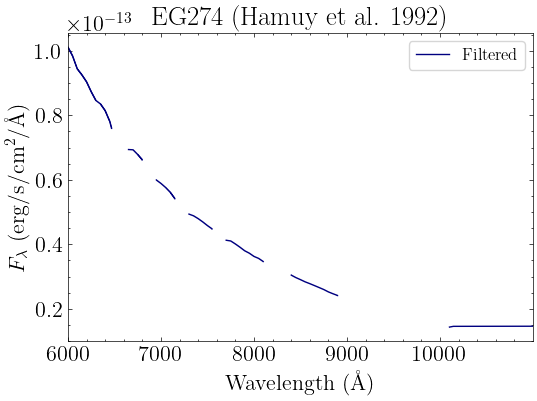

In [54]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.step(wav_ref_filt, flux_ref_filt, where='mid', label='Filtered', color='navy')

ax.set_title('EG274 (Hamuy et al. 1992)')
ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel(r'$F_\lambda$ (erg/s/cm${}^2$/Å)')

ax.set_xlim(wav_1[0],wav_1[-1])
ax.legend()

In [55]:
flux_ref_smooth_func = interpolate.interp1d(x=wav_ref_filt, y=flux_ref_filt, fill_value='extrapolate')
flux_ref_smooth = flux_ref_smooth_func(wav_1)

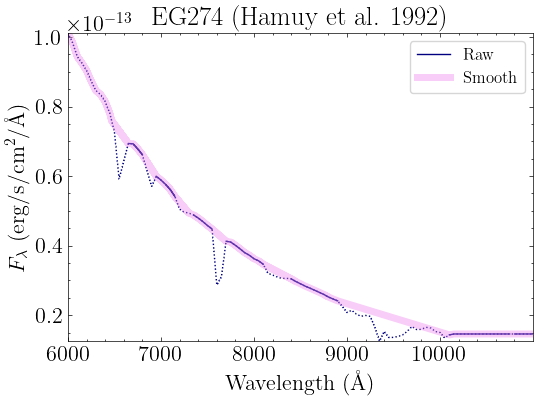

In [56]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.step(wav_1, flux_ref_interp, where='mid', color='navy', linestyle=':')
ax.step(wav_1_filt, flux_ref_filt, where='mid', label='Raw', color='navy')
ax.step(wav_1, flux_ref_smooth, where='mid', label='Smooth', color='violet', lw=5, alpha=.4)

ax.set_title('EG274 (Hamuy et al. 1992)')
ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel(r'$F_\lambda$ (erg/s/cm${}^2$/Å)')

ax.set_xlim(wav_1[0],wav_1[-1])
ax.set_ylim(np.nanmin(flux_ref_interp),np.nanmax(flux_ref_interp))
ax.legend()

Generate the response function

In [57]:
resp_lam_init = flux_1_smooth/flux_ref_smooth
resp_lam_smooth = smooth_func(wav_1, resp_lam_init, 100)

(6000.0, 10998.839907193968)

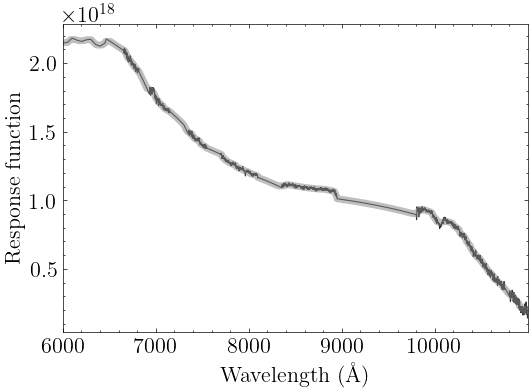

In [59]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.plot(wav_1, resp_lam_init, lw=0.8, alpha=.8)
ax.plot(wav_1, resp_lam_smooth, lw=5, alpha=.5, color='gray')

ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel(r'Response function')

ax.set_xlim(wav_1[0],wav_1[-1])

(6000.0, 10998.839907193968)

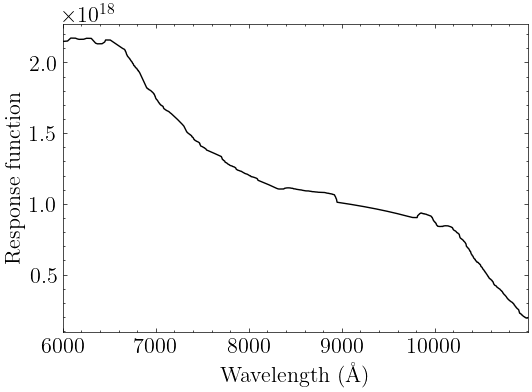

In [60]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.plot(wav_1, resp_lam_smooth)

ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel(r'Response function')

ax.set_xlim(wav_1[0],wav_1[-1])

Save the response function

In [61]:
df = pd.DataFrame()

In [62]:
df['Wavelength'] = wav_1
df['Response'] = resp_lam_smooth

In [63]:
df

,Wavelength,Response
0,6000.000000,2.148838e+18
1,6001.160093,2.148885e+18
2,6002.320186,2.148932e+18
3,6003.480278,2.148979e+18
4,6004.640371,2.149026e+18
...,...,...
4305,10994.199536,1.918363e+17
4306,10995.359629,1.918602e+17
4307,10996.519722,1.922757e+17
4308,10997.679814,1.926912e+17


In [64]:
df.to_csv('/Users/thepoetoftwilight/Documents/CUBS/1D_Extractions_updated/ldss_vph_red_resp.csv', index=False)